![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clustering_II/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Clustering Jerárquico. Fundamentos Teóricos.

Este *cuaderno* trata sobre los distintos algoritmos de clustering jerárquico. Estos algoritmos son una de las posibles formas de clustering o agrupamiento de datos. Los objetivos del *cuaderno* son que usted aprenda los distintos algoritmos de clustering jerárquico, que sea capaz de reconocer sus características y funcionamiento, y  cómo implementarlos.


**NO** es necesario editar el archivo o hacer una entrega. Sin embargo, los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

El mundo que nos rodea contiene muchos ejemplos de sistemas que se organizan en jerarquías. Solemos representar a estas jerarquías en estructuras de árboles que nos permite ver con claridad cómo se relacionan los elementos con sus pares y conceptos abstractos más amplios. Por ejemplo, en la siguiente figura podemos ver la forma de organizar animales domésticos, yendo desde las especies a las razas:


![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clustering_II/main/figs/Animales.jpeg)Este diagrama nos muestra cómo la información relacional entre las razas de animales puede ser fácilmente mapeada de una forma tal que ahorre espacio y transmita una gran cantidad de información. El ejemplo puede también ser visto como un árbol donde se muestran como gatos y perros son diferentes, pero ambos son animales domesticados; o como parte de un árbol más grande que muestra la división entre animales domesticados y los no domesticados.

Veamos otro ejemplo, ahora en el contexto de los negocios web. Una estrategia prudente para estos tipos de negocios es configurar el catálogo de productos como un sistema jerárquico. Al evitar que toda la información se presente a la vez, los clientes sólo estarán expuestos a las ramas del árbol  que coincidan con los intereses de los clientes. Un ejemplo  de navegación jerárquica puede verse en el siguiente diagrama:


![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clustering_II/main/figs/Hogar.jpeg)

Al organizar la información en una estructura jerárquica se puede mejorar significativamente la experiencia de los consumidores. También, uno puede crear estructuras intuitivas en los datos que demuestran relaciones anidadas.


## ¿Qué es el clustering  jerárquico?

Las jerarquías, entonces, son excelentes estructuras para organizar información puesto que muestran claramente relaciones anidadas. Al mismo tiempo que estas nos ayudan a comprender las relaciones entre los elementos, también pueden ser muy útiles para encontrar y formar clusters.

Para ilustrarlo, continuaremos con el ejemplo de los animales de la sección anterior. Imaginemos que simplemente tenemos dos características de los animales, su altura y su peso:

<Axes: xlabel='Peso', ylabel='Altura'>

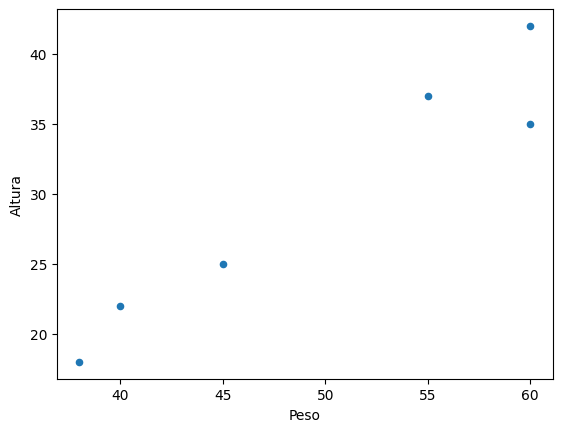

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'Altura': [22, 25, 18, 35, 37, 42], 'Peso': [40, 45, 38, 60, 55, 60]})
df.plot.scatter(y="Altura", x="Peso")


A partir de esta información, vamos a recrear la estructura jerárquica de forma tal que identifiquemos qué puntos corresponden a perros y cuáles a gatos, como también a las distintas razas. Dado que sólo tenemos las alturas y los pesos de los animales, no podremos deducir los nombres específicos de cada especie. Sin embargo, analizando estas características podemos buscar desarrollar una estructura que sirva como aproximación de qué especies de animales existen en los datos. Notemos, además, qué este escenario de aprendizaje no supervisado puede ser resuelto con clustering jerárquico.


Una forma de encarar el clustering jerárquico, es comenzar con cada uno de los puntos individuales que sirven inicialmente como su propio clúster; y luego agrupar recursivamente los puntos cercanos/similares de forma tal que formen clusters que los contienen. Esto se conoce como clustering jerárquico aglomerativo y veremos más detalles en la siguiente sección. Eventualmente, al agrupar recursivamente los puntos individuales con aquellos que son los más cercanos/similares vamos a terminar con una jerarquía construida desde abajo hacia arriba. Cada cluster individual se va a unir a un cluster que los contiene en la parte superior de la jerarquía.

Ilustremos como funciona con unos simples pasos usando los datos del ejemplo anterior:

1. Dados N puntos de datos de una muestra, consideremos cada punto como un "cluster" individual con sólo ese punto como miembro.

In [2]:
clusters =[[22,40],[25,45],[18,38],  [35,60], [37,55], [42,60]]
clusters

[[22, 40], [25, 45], [18, 38], [35, 60], [37, 55], [42, 60]]

2. Calculemos la distancia euclidiana por pares entre los centroides de todos los clusters de sus datos. (Aquí  se pueden utilizar cualquiera de las medidas que aprendimos en el *cuaderno Introducción al Análisis de Clusters.*)


In [3]:
import numpy as np
from scipy.spatial import distance_matrix


# Creamos la matriz de distancias escogiendo p = 2, el cual convierte
# la distancia Minkowski en la distancia Euclidiana
dist = distance_matrix(clusters, clusters, p = 2)

# Para visualizar mejor la matriz de distancia la convertimos en un dataframe
pd.DataFrame(dist)

,0,1,2,3,4,5
0,0.000000,5.830952,4.472136,23.853721,21.213203,28.284271
1,5.830952,0.000000,9.899495,18.027756,15.620499,22.671568
2,4.472136,9.899495,0.000000,27.802878,25.495098,32.557641
3,23.853721,18.027756,27.802878,0.000000,5.385165,7.000000
4,21.213203,15.620499,25.495098,5.385165,0.000000,7.071068
5,28.284271,22.671568,32.557641,7.000000,7.071068,0.000000


3. Agrupamos los clusters/puntos más cercanos. En este caso, son el primero y el tercero; los agrupamos y calculamos la media:

In [4]:
np.mean(np.array([[22,40],[18,38]]), axis=0)

array([20., 39.])

4. Con este nuevo punto remplazamos los dos originales (que ahora forman un cluster) y repetimos los pasos 2 y 3 hasta que obtenemos un nuevo cluster:

In [5]:
clusters2 =[[20,39],[25,45], [35,60], [37,55], [42,60]]
dist2 = distance_matrix(clusters2, clusters2, p = 2)
pd.DataFrame(dist2)

,0,1,2,3,4
0,0.000000,7.810250,25.806976,23.345235,30.413813
1,7.810250,0.000000,18.027756,15.620499,22.671568
2,25.806976,18.027756,0.000000,5.385165,7.000000
3,23.345235,15.620499,5.385165,0.000000,7.071068
4,30.413813,22.671568,7.000000,7.071068,0.000000


En este caso, los más cercanos son [35,60] y [37,55], entonces procedemos como lo hicimos anteriormente y los unimos en un cluster. Si seguimos de forma recursiva (te invito que lo hagas) obtendremos una estructura como la que se muestra en el siguiente gráfico, llamado dendrograma:

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clustering_II/main/figs/plot_hierarchical_notebook.png)

Podemos ver que el primer cluster se forma con las observaciones 1 y 3, luego con la 4 y 5, y así sucesivamente.

5. Luego necesitamos identificar a que nivel se quiere generar los clusters. En este caso, yo elegí dividirlo en dos clusters, y colorear la figura para identificar gatos en morado y perros en verde. Pero si el corte fuese en un nivel superior estaríamos agrupando todos los animales en un sólo cluster.

Para verlo más concretamente supongamos que tenemos nuevamente el siguiente dendrograma:

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S4_clustering_II/main/figs/Animales_Clusters2.jpeg)

Si sólo estuviésemos interesados en agrupar los datos en razas de perros y gatos, se podría dejar de agrupar en el primer nivel. Sin embargo, si quisiera agrupar todas las especies en animales domesticados o no domesticados, podría dejar de agrupar en el nivel dos. Lo bueno de la agrupación jerárquica y de los dendrogramas es que podemos ver el desglose completo de las posibles agrupaciones para elegir.

## Analizando un dendrograma


El dendrograma es una representación gráfica del resultado del proceso de agrupamiento en forma de árbol. La construcción es relativamente sencilla y se hace de la siguiente forma:

   1. En la parte inferior del gráfico se colocan las N observaciones iniciales.
   2. La unión de elementos se representan por tres líneas rectas. Dos líneas son perpendiculares a los elementos que se van a unir, y su altura va a estar dada por la distancia que hay entre los elementos. La tercera línea, las une.
   3. El proceso se repite hasta que todos los elementos están conectados por líneas rectas.

Entonces cada vez que se fusionan dos elementos o clusters, el dendrograma muestra una conexión correspondiente al nivel de distancia/disimilitud en el que se produjo. Por lo tanto, si cortamos el dendrograma a un nivel de distancia dado, obtenemos un número de clusters existentes en ese nivel y los elementos que lo conforman.

Para ilustrar la construcción del dendrograma vamos a comenzar nuevamente simulando unos pocos datos. En este ejemplo, por simplicidad, vamos a usar sólo 12 datos:

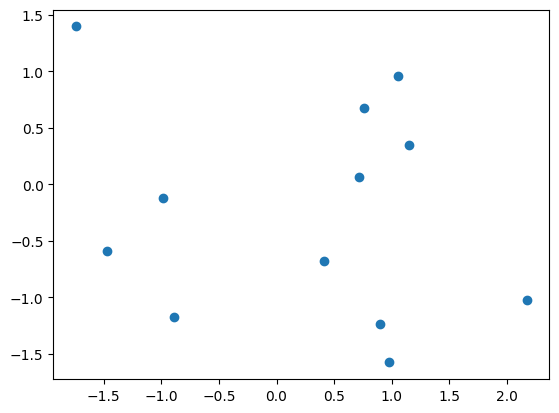

In [7]:
#Cargamos las librerías a utilizar
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


#Creamos y visualizamos los datos
X, y = make_blobs(n_samples=12, n_features=2, center_box=(-1, 1), centers=4, random_state=1000)

plt.scatter(X[:,0], X[:,1])
plt.show()

Para generar un dendrograma vamos a usar la librería [sciPy](https://scipy.org/), pero te invito a que explores como hacerlo con [Scikit-learn](https://scikit-learn.org/stable/).

El primer paso es crear la matriz de distancias. Para ello vamos a usar en este ejemplo la distancia euclidiana con el método de Ward:


In [8]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

dist = pdist(X, metric='euclidean')
Z = linkage(dist, method='ward')


`dist` entonces es la matriz de distancias y `Z` es la matriz de enlaces que surge de usar el método de Ward (más sobre esto en las secciones siguientes). Con esta matriz `Z` podemos generar y graficar el dendrograma con la función `dendrogram()`:

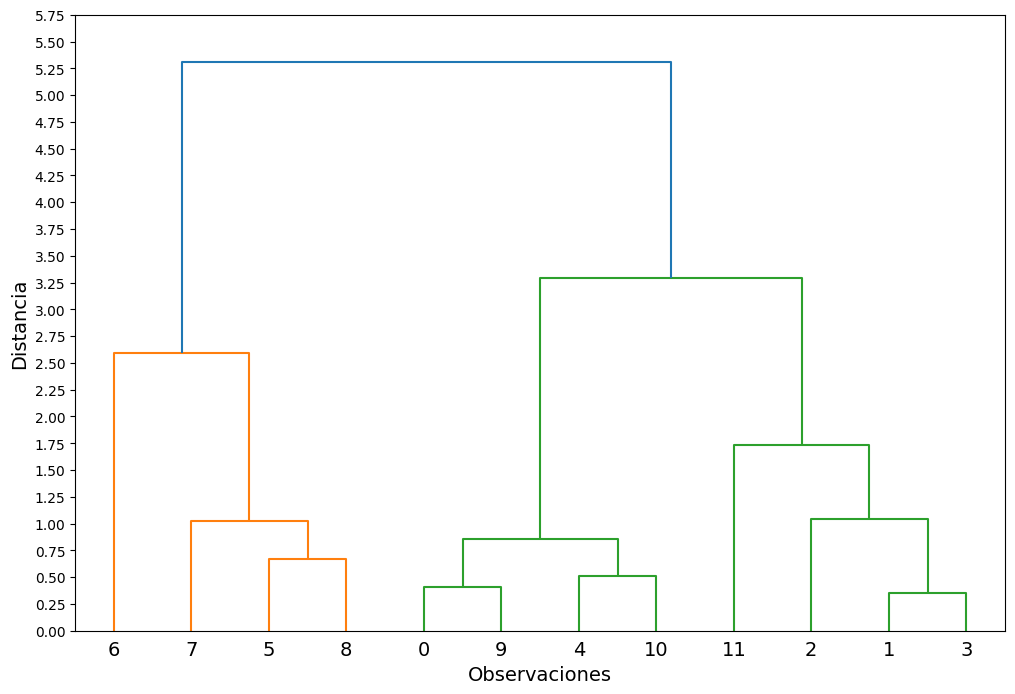

In [9]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 6, 0.25))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()


El eje x entonces muestra las observaciones iniciales y cómo estas se unen con líneas rectas formando los distintos clusters. El eje y muestra la distancias. Por lo que en distancia igual a cero todas las observaciones son  consideradas como independientes. Si nos movemos hacia arriba comenzamos a ver las primeras uniones. En particular, cuando la distancia es de aproximadamente 0.35, las observaciones 1 y 3 se fusionan. La segunda unión ocurre con una distancia ligeramente por debajo de 0.5, cuando las muestras 0 y 9  se fusionan.

Supongamos ahora que decidimos diseccionar el dendrograma horizontalmente cuando la distancia sea igual a 1.25. A esta altura podemos ver que la estructura de clusters es: {6}, {7, 5, 8}, {0, 9, 4, 10}, {11}, {2, 1, 3}. Es decir, tenemos cinco clusters, dos de ellos formados por una sola observación.

Este tipo de herramienta es útil cuando existe una estructura jerárquica en los datos. Sin embargo,  puede ser engañoso si la estructura subyacente no es jerárquica, ya que va el dendrograma va a dar la impresión de que dos puntos están próximos cuando realmente no están no lo están; y parecerán alejados cuando realmente son próximos.

## Clustering jerárquicos aglomerativo

En el ejemplo de la sección anterior ilustramos la intuición del clustering aglomerativo, y en esta sección  desarrollaremos los detalles del algoritmo.

Recapitulando, obtuvimos el dendrograma a través de un algoritmo extremadamente simple. Primero comenzamos en la parte inferior del dendrograma, tratando a las N observaciones como su propio clusters y definimos una medida de cercanía/disimilitud entre cada par de observaciones. En nuestro caso,  usamos la distancia euclidiana; pero podríamos haber utilizado  cualquiera de las medidas que aprendimos en el *cuaderno Introducción al Análisis de Clusters.* Luego, los dos clusters que son más similares entre sí se fusionan para que haya n − 1 clusters. Luego, los dos clusters que son más similares entre sí se fusionan nuevamente, de modo que ahora hay n − 2 grupos. El algoritmo procede de esta manera hasta que todas las observaciones pertenecen a un sólo cluster y el dendrograma está completo. En resumen:
     
   *Algoritmo Jerárquico Aglomerativo:*
   1. Comenzar con N observaciones y una medida (como la distancia Euclidiana) de todas las $\left(\begin{array}{c}
n\\
2
\end{array}\right)=\frac{n(n-1)}{2}$ disimilitudes por pares. Tratar cada observación como su propio grupo.

   2. Para $i=n,n−1,...,2$ :
      
      (a) Examinar todas las disimilitudes entre clusters por pares entre los $i$ clusters e identificar el par de clusters que son más similares. Fusionar estos dos grupos. La disimilitud entre estos dos clusters indica la altura en el dendrograma en el que debe colocarse la fusión.
      
      (b) Calcular las nuevas disimilitudes entre grupos por pares entre los $i − 1$ grupos restantes.


Para implementarlo en `Python` no es necesario hacer manualmente los pasos que describimos anteriormente. Podemos usar las librerías [Scikit-learn](https://scikit-learn.org/stable/) o  [sciPy](https://scipy.org/). Para ilustrar como funciona generamos primero datos ficticios. Vamos a simular 1000 observaciones con 2 atributos y con 4 clusters, usando la función `make_blobs` de la librería `Scikit-learn`. Para hacer replicable el ejercicio, elegiremos la semilla (`random_state`) `800` (te invito a probar cambiando la semilla):

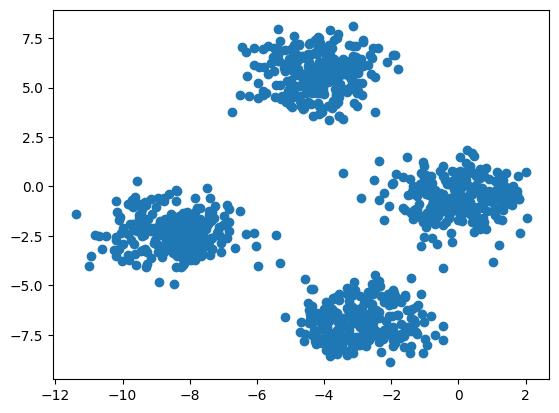

In [10]:
#Creamos y visualizamos los datos
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=800)
plt.scatter(X[:,0], X[:,1])
plt.show()

Para implementar con `Scikit-learn` usamos la función `AgglomerativeClustering:`

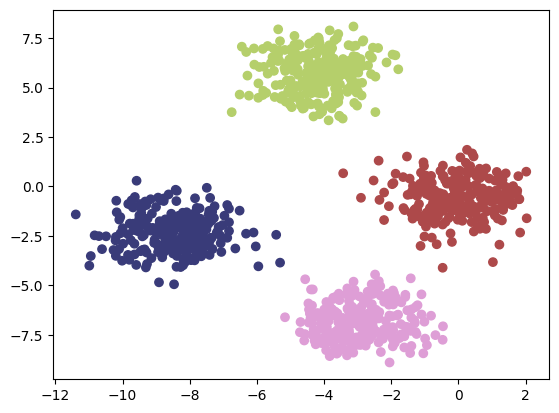

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster_sk = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')
cluster_sk =cluster_sk.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=cluster_sk, cmap='tab20b')
plt.show()



Para hacerlo con `sciPy` usamos las funciones `linkage` y `fcluster`:

In [12]:
from scipy.cluster.hierarchy import linkage, fcluster


Luego calculamos la matriz de distancias con la función `linkage`:

In [13]:
distances = linkage(X, method="centroid", metric="euclidean")

Finalmente, calculamos los clusters con la función `fcluster`:

In [14]:
clusters = fcluster(distances, 3, criterion="distance")

Con estos clusters podemos visualizar el resultado:

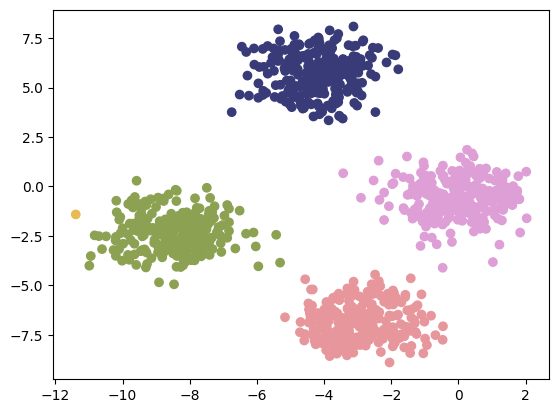

In [15]:
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
plt.show()

Este algoritmo parece bastante simple, pero hasta este momento hemos evitado discutir un problema. Consideremos el ejemplo de los perros y gatos. ¿Cómo determinamos que el clúster `[22,40],[18,38]` debe fusionarse con el clúster `[25,45]`?

Definimos en *cuaderno Introducción al Análisis de Clusters* el concepto de la distancia/disimilitud entre pares de observaciones; pero ¿cómo definimos a este concepto para aplicarlo entre dos clusters si uno o ambos clusters contienen múltiples observaciones? Debemos entonces extender el concepto de distancia/disimilitud para grupos de observaciones.

Esta extensión se logra desarrollando la noción de enlace, o *linkage* en inglés, que define la distancia/disimilitud entre dos grupos de observaciones.

### Enlaces

Los cuatro tipos más comunes de enlace son: simple, completo, promedio, y centroide. Pero antes de describirlos establezcamos cierta notación: comenzamos definiendo $G$ y $H$ como dos grupos. La distancia entre $G$ y $H$: $d(G,H)$, se calcula a partir del conjunto de distancias por pares de observaciones: $d_{ii'}$, donde un miembro del par: $i$, está en $G$ y el otro miembro: $i'$, está en $H$.

   - **Enlace simple**
   
   También conocido como técnica del vecino más cercano; en este método combinamos los clusters, basándonos en los dos puntos más cercanos de cada cluster. Para lograrlo, tomamos las distancias por pares entre las observaciones del cluster $G$ y las observaciones del cluster $H$, y guardamos la menor:

    $$d_{SL}(G, H)= min_{i\in G,\ i'\in H} d_{ii'}$$

   Este método puede dar como resultado clusters extensos en los que las observaciones se van fusionando de una en una.
   
   
   - **Enlace completo (complete linkage - CL)**
   
   El enlace completo o técnica del vecino más lejano, es lo opuesto al enlace simple y combina los clusters encontrando la distancia máxima entre las observaciones del cluster $G$ y las observaciones del cluster $H$:

    $$d_{CL}(G, H)= max_{i\in G,\ i'\in H} d_{ii'}$$

   En otras palabras, funciona combinando clusters en función de los puntos más alejados entre los dos clusters.
   
   
   - **Enlace promedio de grupo (average )**

   El enlace promedio de grupo utiliza la mínima distancia promedio entre los grupos. Es decir, calculamos todas las distancias entre pares de ambos clusters, y calculamos el promedio:

    $$d_{Average}(G, H)=min\left\{ \frac{1}{N_G N_H}\sum_{i\in G}\sum_{i'\in H}d_{ii'}\right\}$$

   donde $N_G$ y $N_H$ son los números respectivos de observaciones en cada cluster.


   - **Enlace usando centroides (Centroid)**

   Este método usa la mínima distancia entre los centroides del cluster $G$ y el cluster $H$, donde los centroides están definidos por el promedio del cluster:

   \begin{align}
    d_{Centroid}(G, H)= min \left\{ d \left(\frac{\sum_{i\in G}i}{N_G},\frac{\sum_{i'\in H}i'}{N_H}\right)\right\}
   \end{align}
   
   
   - **Enlace de Ward**
   
   En este método combinamos dos clusters para los cuales se tenga el menor incremento en el valor total de la suma de los cuadrados de las diferencias dentro de cada cluster de cada individuo al centroide del cluster.
   
    \begin{align}
    d_{Ward}(G, H)= \sum_{i\in G} \left( i -\frac{\sum_{i'\in H}i'}{N_H}\right)^2
   \end{align}
   
   Intuitivamente lo que busca es que al unirse los clusters haya una reducción de la varianza, es decir, aumente la cohesión interna del cluster y las observaciones sean lo más similares entre ellas.

Los enlaces *simple*, *completo*, y *promedio de grupo* son los más populares entre los estadísticos. Es más, si los datos exhiben una fuerte tendencia a agruparse, y cada uno de los clusters son compactos y bien separados, estas tres medidas darán resultados similares. Por lo general, se prefiere el enlace *promedio* y *completo* al enlace simple, ya que tienden a producir dendrogramas más equilibrados.

El enlace usando *centroides* se emplea más a menudo en disciplinas específicas como la genómica, pero tiene la desventaja de que al usarlo  puede generar inversiones. Una inversión ocurre cuando dos clusters se fusionan a una altura por debajo de los datos individuales en el dendrograma. Esto puede conducir a dificultades tanto en la visualización como en la interpretación del dendrograma.

Por otro lado, el enlace de *Ward* tiende a generar clusters que contienen el mismo número de observaciones y a evitar la presencia de clusters pequeños junto a clusters muy grandes.

Finalmente, cabe aclarar que en la práctica no existe un método para decidir que enlace utilizar. Lo que se suele hacer es probar varias opciones diferentes y buscar la que tenga la solución más útil o interpretable. No hay una sola respuesta correcta; se debe considerar cualquier solución que exponga algunos aspectos interesantes de los datos.


Veamos en `Python` como cambian los resultados cuando usamos otros métodos de enlace:

In [16]:
methods = ['single', 'complete', 'average', 'centroid','ward']

Generemos un bucle para ver los efectos que tienen sobre estos datos ficticios:

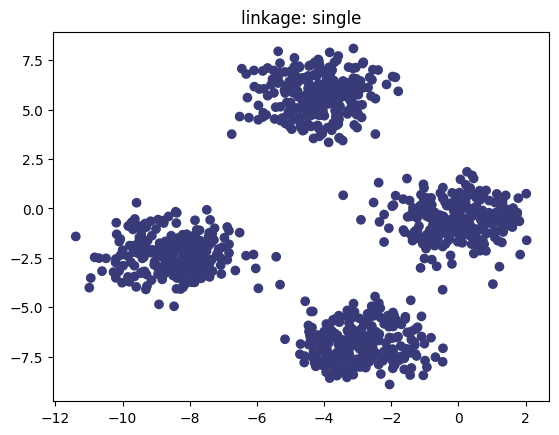

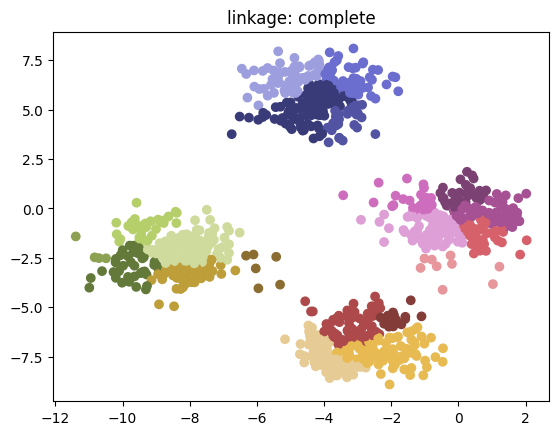

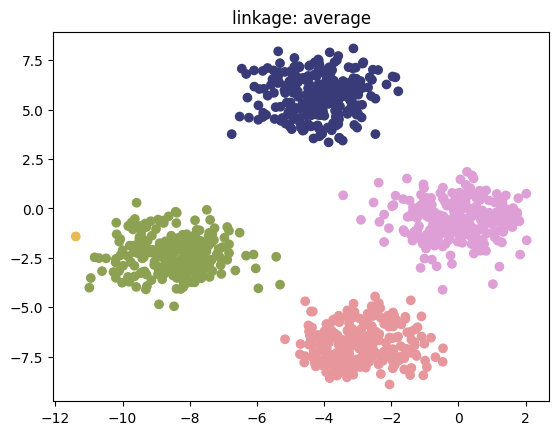

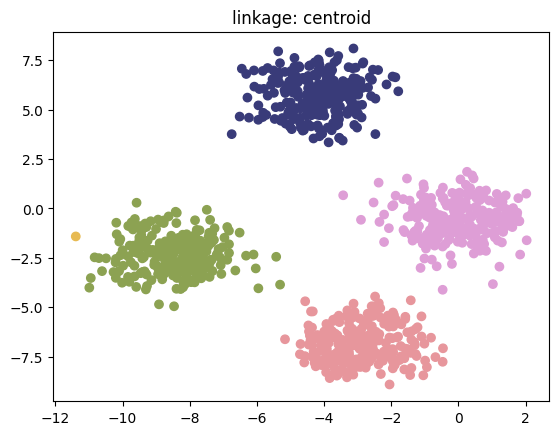

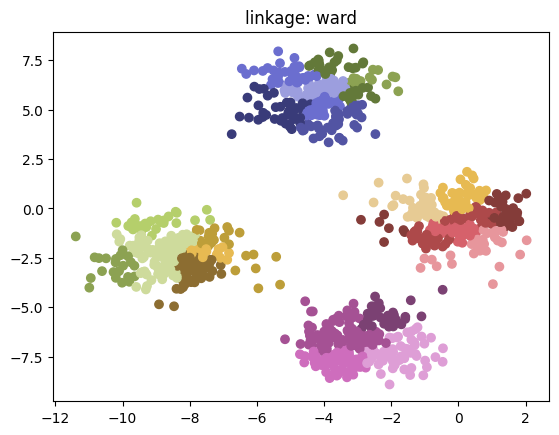

In [17]:
for method in methods:
    distances = linkage(X, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance")
    plt.title('linkage: ' + method)
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
    plt.show()

Como se muestra en los gráficos anteriores, simplemente cambiando los criterios de enlaces, se puede cambiar drásticamente los clusters que obtenemos.

En este conjunto de datos, el método de *promedio de grupos* y el de *centroides* son los únicos que muestran los clusters representados con ocho colores diferentes. Esto se debe a que generamos un conjunto de datos de ocho clusters relativamente homogéneos y separados entre sí.

Para continuar explorando como cambian los resultados dependiendo de los enlaces te invito a que explores que pasa cuando tenemos datos que siguen los siguientes seis procesos generadores de datos:


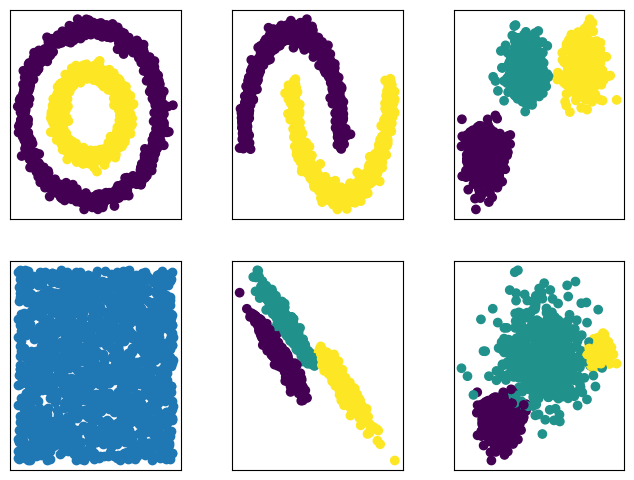

In [18]:
from sklearn import cluster, datasets

np.random.seed(666)
n_observaciones = 1500

# Creamos 6 bases de datos con mecanismos generadores de datos diferentes.
circulos = datasets.make_circles(n_samples = n_observaciones, factor = .5, noise = .05, random_state = 666)
lunas = datasets.make_moons(n_samples = n_observaciones, noise = .05, random_state = 666)
nubes = datasets.make_blobs(n_samples = n_observaciones, centers = 3, random_state = 170)
aleatorio = np.random.rand(n_observaciones, 2), None

transformacion = [[0.6, -0.6], [-0.4, 0.8]]
X_nubes2 = np.dot(nubes[0], transformacion)
nubes2 = (X_nubes2, nubes[1])

nubes3 = datasets.make_blobs(n_samples = n_observaciones, centers = 3, cluster_std = [1.0, 2.5, 0.5], random_state = 170)

datos = [
    (circulos, {'n_clusteres': 2}),
    (lunas, {'n_clusteres': 2}),
    (nubes, {'n_clusteres': 3}),
    (aleatorio, {'n_clusteres': 3}),
    (nubes2, {'n_clusteres': 3}),
    (nubes3, {'n_clusteres': 3})
    ]

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(left = .02, right = .98, bottom = .001, top = .96, wspace = .3, hspace = .2)

axs = axs.ravel()
n = 0
for df in datos:
    df = df[0]
    axs[n].scatter(x = df[0][:,0], y = df[0][:,1], c = df[1])
    axs[n].set_xticks([])
    axs[n].set_yticks([])
    n += 1

## Clustering jerárquico divisivo

Una segunda forma de obtener un clustering jerárquico es a través de un enfoque de arriba hacia abajo. Para ello, usamos algoritmos divisivos: estos comienzan con todo el conjunto de datos como un único cluster y lo dividen de forma recursiva en dos clústeres secundarios y así sucesivamente.

Para lograrlo, el algoritmo divisivo más utilizado es el propuesto por Macnaughton Smith et al (1965). Para implementar este algoritmo se siguen los siguientes pasos:

   1. Comenzamos colocando todas las observaciones en un solo cluster $G$.
   2. Elegimos la observación cuya distancia promedio a todas las demás observaciones sea mayor. Esta observación forma el primer miembro de un segundo grupo $H$.
   3. Luego identificamos la observación en $G$ cuya distancia promedio a las de $H$, menos la de las observaciones restantes en $G$, es positiva, y la transferimos a $H$.
   4. Esto continúa hasta que la diferencia correspondiente en promedios se vuelva negativa. Es decir, ya no hay observaciones en $G$ que estén, en promedio, más cerca de las de $H$. El resultado es una división del grupo original en dos subgrupos, las observaciones que se transfieren a $H$ y las que se quedan en $G$. Estos dos grupos representan el segundo nivel de la jerarquía.
   5. Cada nivel sucesivo se produce aplicando este procedimiento de división a uno de los grupos del nivel anterior.
 Kaufman y Rousseeuw (1990) sugieren elegir el cluster con el diámetro más grande para la división. Otra alternativa sería elegir el cluster que tenga la mayor distancia promedio entre sus miembros.
$$\bar{d_G}=\frac{1}{N_G^2}\sum_{i\in G}\sum_{i'\in G} d_{ii'}$$

La partición recursiva continua hasta que todos los clústeres se vuelvan singletons, es decir tienen un solo elemento, o todos los miembros de cada cluster tengan distancia/disimilitud cero entre ellos.


Para ilustrar los pasos supongamos que tenemos el siguiente ejemplo con 5 observaciones: a,b,c,d, y e. Tenemos además la matriz de distancias:

| Distancia | a  | b | c | d  | e |
|----------|----|---|---|----|---|
| a        | 0  | 2 | 6 | 10 | 9 |
| b        | 2  | 0 | 5 | 9  | 8 |
| c        | 6  | 5 | 0 | 4  | 5 |
| d        | 10 | 9 | 4 | 0  | 3 |
| e        | 9  | 8 | 5 | 3  | 0 |

   1. En el primer paso todas las observaciones pertenecen a un sólo cluster:
   $$ G = \{a,b,c,d,e\}$$
   2. Luego calculamos la distancia promedio y elegimos aquella que sea mayor:
       - Distancia promedio de $a$ a los otros puntos: promedio(2,6,10,9)=6.75
       - Distancia promedio de $b$ a los otros puntos: promedio(2,5,9,8) =6.0
       - Distancia promedio de $c$ a los otros puntos: promedio(6,5,4,5) =5.0
       - Distancia promedio de $d$ a los otros puntos: promedio(10,9,4,3)=6.5
       - Distancia promedio de $e$ a los otros puntos: promedio(9,8,5,3) =6.25
       
       La distancia de $a$ es la mayor por lo que ahora tenemos 2 clusters:
          $$ G' = \{b,c,d,e\} \,\, y \,\, H=\{a\}$$
          
   3. En este paso calculamos las distancias de cada elemento en $G'$ y la distancia promedio a las de $H$, y tomamos la diferencia. Si esta es positiva, la transferimos a $H$.
   

|   |  Distancia promedio a $G'$ | Distancia promedio a $H$   |  Diferencia |
| - | ------------------------- | -------------------------| ------------|
| b | (5+9+8)/3=7.33 				|   2   				   | $>0$        |
| c | (5+4+5)/3=4.67 				|   6 					   | $<0$ 		 |  
| d | (9+4+3)/3=5.33 				|   10					   | $<0$ 		 |   	  
| e | (8+5+3)/3=5.33 				|   9 					   | $<0$ 		 |  
    
   En este caso debemos transferir $b$ a $H$ y tenemos:

\begin{align}    
G' = \{c,d,e\} \,\, y \,\, H =\{a,b\}
\end{align}    

   4. Continuamos con estos pasos y tenemos:
     
|   |  Distancia promedio a $G'$ | Distancia promedio a $H$   |  Diferencia |
| - | ------------------------- | -------------------------| ------------|
| c | (4+5)/2=4.5 				 |   (6+5)/2=5.5 		   | $<0$ 		 |  
| d | (4+3)/2=3.5				 |   (10+9)/2=9.5					   | $<0$ 		 |   	  
| e | (5+3)/2=4 				 |   (9+8)/2=8.5 					   | $<0$ 		 |
     
   Todas las diferencias son negativas, por lo que no transferimos nuevos elementos y este nivel esta conformado por los clusters:
                    
\begin{align}    
G' = \{c,d,e\} \,\, y \,\, H =\{a,b\}
\end{align}    

Finalmente tenemos que elegir que cluster dividir, y podemos seguir dos caminos:

- Elegir aquel con el diámetro más grande, en este caso sería G' = \{c,d,e\}.
- Elegir aquel con la distancia promedio más grande entre sus miembros, en este caso sería nuevamente $G'$.
                   

Si bien este tipo de estrategia es intuitivamente sencilla, en la práctica no suele utilizarse. Evidencia de esto es que librerías en `Python` como [Scikit-learn](https://scikit-learn.org/stable/) o  [sciPy](https://scipy.org/) no tienen métodos que lo implementen. En el software `R`, sin embargo, está implementada en el paquete [`cluster`](https://cran.r-project.org/web/packages/cluster/index.html)  con la función `DIANA (DIvisive ANAlysis)`. (Si estás familiarizado con `R` te invito a que explores esta función.)


## Elección de medida de distancia o disimilitud

Hasta el momento en el cuaderno hemos utilizado la distancia euclidiana como nuestra medida distancia o disimilitud. Pero a veces es bueno considerar otras medidas como las vistas en el *cuaderno Introducción al Análisis de Clusters.* Por ejemplo, como vimos anteriormente, una distancia basada en correlación considera que dos observaciones son similares si sus características están altamente correlacionadas aunque los valores observados estén distantes en términos de la distancia euclidiana. Esto es un uso un tanto inusal de la correlación, que es  normalmente calculada entre variables, pero que acá usamos entre observaciones.

La figura a continuación ilustra como cambia dramáticamente el dendrograma de la sección *Analizando un dendrograma* cuando usamos esta nueva medida de distancia. Esto tiene que ver que la distancia basada en correlación no se enfoca en las magnitudes de las observaciones sino en los perfiles generales de las observaciones.

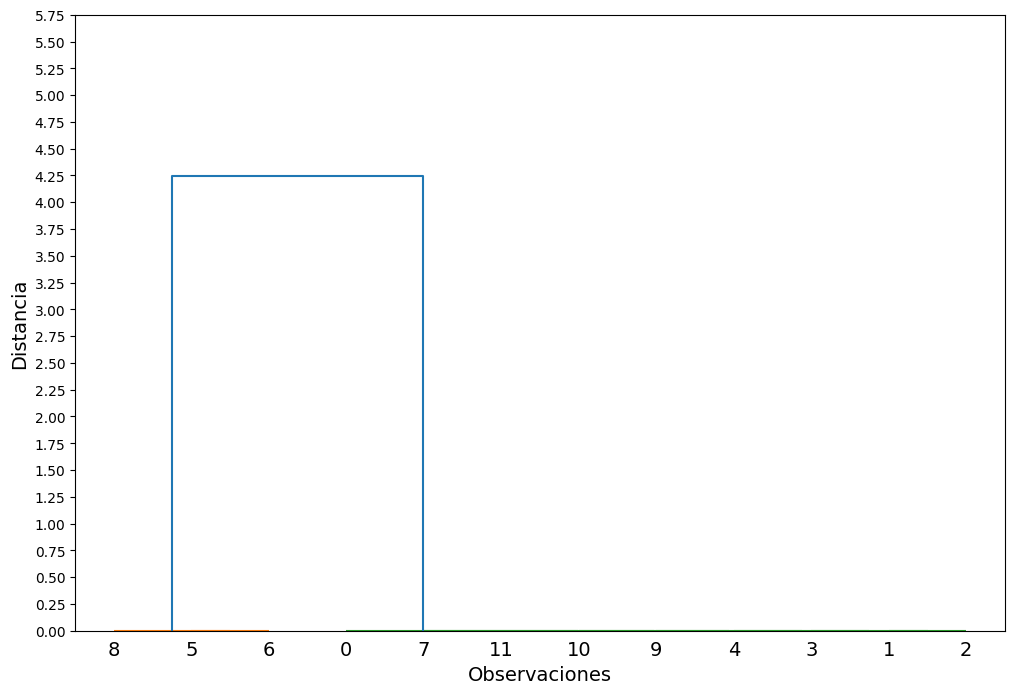

In [20]:
#Creamos y visualizamos los datos
X, y = make_blobs(n_samples=12, n_features=2, center_box=(-1, 1), centers=4, random_state=1000)

dist = pdist(X, metric='correlation')
Z2 = linkage(dist, method='ward')

fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(Z2, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
ax.set_yticks(np.arange(0, 6, 0.25))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

La elección de medidas de disimilaridad es muy importante y como vimos anteriormente puede tener fuerte efectos en el dendrograma. Por lo tanto, es importante prestar atención al tipo de datos que tenemos y la pregunta que se busca responder.

## Consideraciones Finales


Una de las principales ventajas del clustering jerárquico es que a diferencia de los basados en centroides, K-medias o K-medoides, no es necesario elegir a priori el número de clusters. Sin embargo, es necesario especificar los enlaces y la medida de distancia o disimilitud, que como vimos anteriormente, pueden tener fuertes repercusiones en los resultados que obtenemos. Además, es necesario considerar si los datos deben ser escalados de forma tal que tengan desvío estándar unitario antes de calcular la medidas de distancia. Esto también va a tener repercusiones en los resultados, pero esta decisión como las anteriores dependerán del problema bajo estudio.


Por otro lado, tanto K-medias o K-medoides como el clustering jerárquico forzosamente van a asignar a todas las observaciones a un cluster. Sin embargo, esto a veces, puede no ser apropiado. Por ejemplo, supongamos que la mayoría de observaciones en efecto pertenecen a un pequeño pero desconocido número de clusters, y un pequeño subconjunto de las observaciones son muy diferentes entre ellas y de las demás observaciones. Entonces, dado que K-medias, K-medoides y el clustering jerárquico fuerza cada una de las observaciones a un cluster, estos se van a ver distorsionados por la presencia de estas observaciones atípicas (outliers) que no pertenecen a ningún cluster.

Finalmente, a menudo cuando empleamos los algoritmos de clustering jerárquico, estamos interesados en obtener un pequeño conjunto de clusters. Sin embargo, en este contexto no hay una guía que nos diga donde cortar el dendrograma, esto queda a juicio del investigador, y es uno de los pasos fundamentales que todavía no están resueltos.


# Referencias



- Hastie, T., Tibshirani, R., & Friedman, J. H. (2001). The elements of statistical learning: Data mining, inference, and prediction. New York: Springer.

-   James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.

- Jones, Aaron; Kruger, Christopher; Johnston, Benjamin. The Unsupervised Learning Workshop: Get started with unsupervised learning algorithms and simplify your unorganized data to help make future predictions. Packt Publishing. Kindle Edition.

- Kaufman, L. & Rousseeuw, P. (1990). Finding Groups in Data: An Introduction to Cluster Analysis, Wiley, New York.

- Macnaughton Smith, P., Williams, W., Dale, M. & Mockett, L. (1965). Dissimilarity analysis: a new technique of hierarchical subdivision, Nature 202: 1034–1035.

- Patel, A. A. (2019). Hands-on unsupervised learning using Python: how to build applied machine learning solutions from unlabeled data. O'Reilly Media.

-   Peña, D. (2002). Análisis de datos multivariantes (Vol. 24). Madrid: McGraw-hill.

- [Scikit-learn: Machine Learning in Python](https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py), Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
